<a href="https://colab.research.google.com/github/gauravraidata/IITJ-projects/blob/main/AI_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A.) Dynamic Goal-Based Agent for Warehouse Logistics Optimization.
A robotic agent operates in a warehouse modeled as an N×M grid environment. The agent starts
at a predefined loading dock and must deliver packages to multiple destinations marked on the
grid while avoiding dynamically placed obstacles.
Take suitable values of the following parameters.
- Warehouse dimensions: N×M grid size (M,N between 5 and 10, inclusive)
- Number of packages: P (between 2 and 6, inclusive)
- Number of obstacles: O (between 1 and 10, inclusive)
- Package locations: (X1, Y1), (X2, Y2), ... (XP, YP)
- Drop-off locations: (D1X, D1Y), (D2X, D2Y), ... (DPX, DPY)
- Robot starting position: S=(Sx
,Sy), starts at a fixed cell but moves dynamically
- Movement cost: Each movement incurs a cost of 1 unit
- Delivery reward: Successfully delivering a package adds 10 units to the total reward
- Obstacle penalty: Hitting an obstacle results in a (-5) penalty
Note : Packages locations and drop-off locations should not overlap.

Q1. Represent the warehouse as an N×M matrix. Place the packages, drop-off points, and
obstacles randomly. Display the initial warehouse configuration.

Q2. Implement a goal-based agent that can identify all goals, plan a sequence of actions to reach
the goal, use a search algorithm (BFS, DFS, or UCS) to find optimal paths, deliver all packages,
and calculate the total cost.

Q3. Choose a random seed value for the ease of reproducing the results. Your program should
give outputs: the chosen path taken by the agent, total cost and rewards, final score based on
penalties, movement costs, and successful deliveries.

In [ ]:
import random
import numpy as np
from queue import Queue
import matplotlib.pyplot as plt
import seaborn as sns

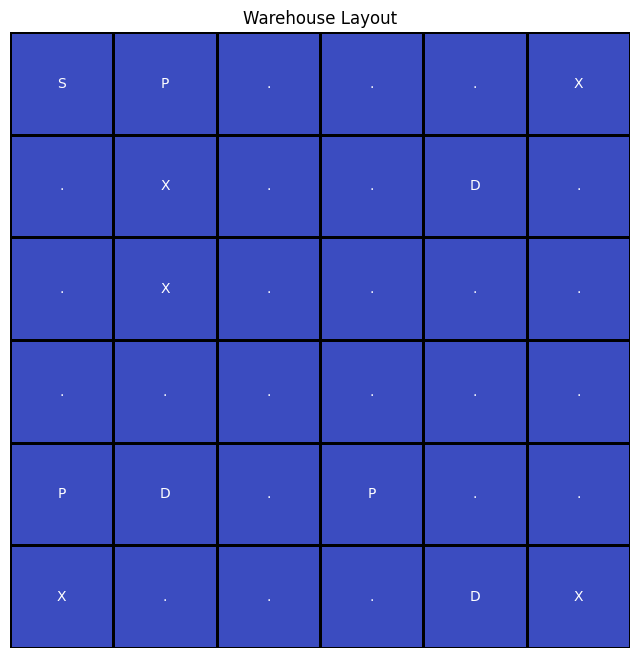


Path for P1 (Pickup: (4, 0) -> Dropoff: (1, 4)):


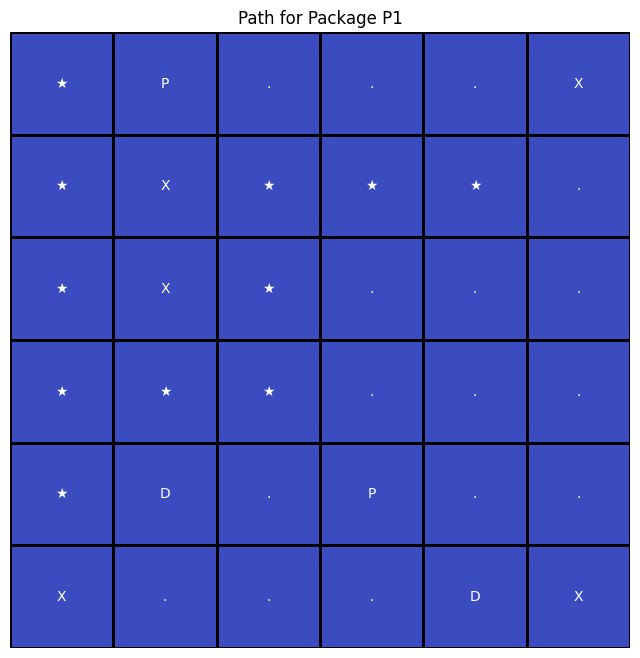


Path for P2 (Pickup: (4, 3) -> Dropoff: (4, 1)):


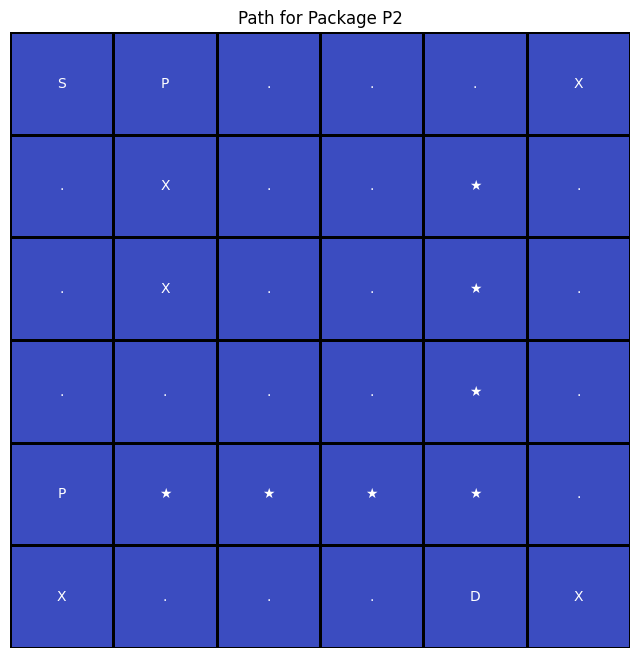


Path for P3 (Pickup: (0, 1) -> Dropoff: (5, 4)):


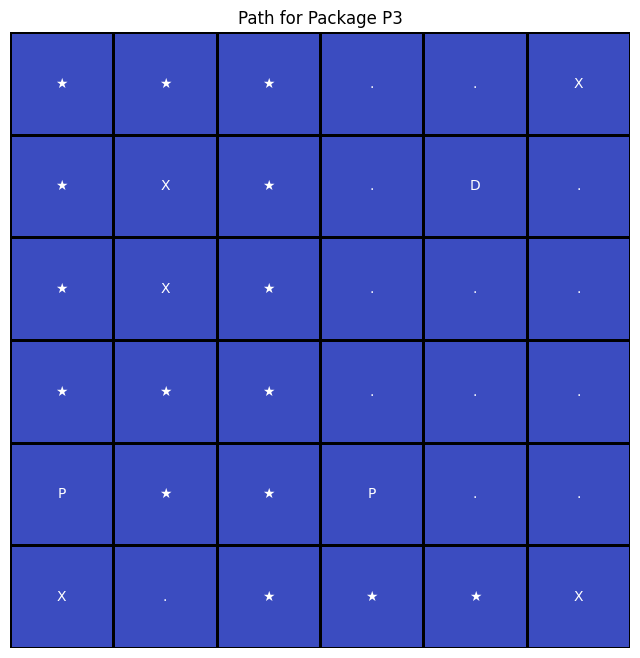


Total Cost: 37
Total Reward: 30
Final Score: -7


In [17]:
class WarehouseAgent:
    def __init__(self, N, M, P, O, seed=42):
        self.N = N
        self.M = M
        self.P = P
        self.O = O
        self.seed = seed
        self.total_cost = 0
        self.reward = 0
        self.start = (0, 0)
        self.warehouse, self.packages, self.dropoffs, self.obstacles = self.initialize_warehouse()

    def initialize_warehouse(self):
        random.seed(self.seed)
        warehouse = np.full((self.N, self.M), '.', dtype=str)
        obstacles = set()
        while len(obstacles) < self.O:
            x, y = random.randint(0, self.N-1), random.randint(0, self.M-1)
            if (x, y) not in obstacles:
                obstacles.add((x, y))
                warehouse[x, y] = 'X'

        package_locations = []
        dropoff_locations = []
        while len(package_locations) < self.P:
            px, py = random.randint(0, self.N-1), random.randint(0, self.M-1)
            if (px, py) != self.start and (px, py) not in obstacles and (px, py) not in package_locations and (px, py) not in dropoff_locations:
                package_locations.append((px, py))
                warehouse[px, py] = f'P{len(package_locations)}'

        while len(dropoff_locations) < self.P:
            dx, dy = random.randint(0, self.N-1), random.randint(0, self.M-1)
            if (dx, dy) not in obstacles and (dx, dy) not in package_locations and (dx, dy) not in dropoff_locations:
                dropoff_locations.append((dx, dy))
                warehouse[dx, dy] = f'D{len(dropoff_locations)}'

        warehouse[self.start] = 'S'
        return warehouse, package_locations, dropoff_locations, obstacles

    def display_warehouse(self):
        plt.figure(figsize=(8, 8))
        sns.heatmap(np.zeros_like(self.warehouse, dtype=float), annot=self.warehouse, cmap='coolwarm', cbar=False, linewidths=1, linecolor='black', fmt='')
        plt.xticks([])
        plt.yticks([])
        plt.title("Warehouse Layout")
        plt.show()

    def bfs_search(self, start, goal):
        queue = Queue()
        queue.put((start, []))
        visited = set()

        while not queue.empty():
            (x, y), path = queue.get()

            if (x, y) == goal:
                return path + [(x, y)]

            if (x, y) in visited:
                continue
            visited.add((x, y))

            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < self.N and 0 <= ny < self.M and (nx, ny) not in self.obstacles and (nx, ny) not in visited:
                    queue.put(((nx, ny), path + [(x, y)]))

        return []

    def display_path(self, path, package_num):
        temp_warehouse = np.copy(self.warehouse)
        for i, (x, y) in enumerate(path):
            temp_warehouse[x, y] = '★'

        plt.figure(figsize=(8, 8))
        sns.heatmap(np.zeros_like(temp_warehouse, dtype=float), annot=temp_warehouse, cmap='coolwarm', cbar=False, linewidths=1, linecolor='black', fmt='')
        plt.xticks([])
        plt.yticks([])
        plt.title(f"Path for Package P{package_num}")
        plt.show()

    def run(self):
        self.display_warehouse()

        for i in range(self.P):
            pickup = self.packages[i]
            dropoff = self.dropoffs[i]

            path_to_pickup = self.bfs_search(self.start, pickup)
            path_to_dropoff = self.bfs_search(pickup, dropoff)

            if path_to_pickup and path_to_dropoff:
                self.total_cost += len(path_to_pickup) + len(path_to_dropoff)
                self.reward += 10
                self.start = dropoff

                print(f"\nPath for P{i+1} (Pickup: {pickup} -> Dropoff: {dropoff}):")
                self.display_path(path_to_pickup + path_to_dropoff, i+1)

        final_score = self.reward - self.total_cost
        print("\nTotal Cost:", self.total_cost)
        print("Total Reward:", self.reward)
        print("Final Score:", final_score)

if __name__ == "__main__":
    agent = WarehouseAgent(N=6, M=6, P=3, O=5)
    agent.run()
